In [58]:
from typing import TypedDict
from langgraph.graph import StateGraph,END, START
import wikipedia
from datetime import datetime
from googlesearch import search
import pytz
from pprint import PrettyPrinter
from IPython.display import Image, display
import pywhatkit as kt

In [59]:
### Creating the Base Class TypedDict

class QueryState(TypedDict):
    query:str
    source:str
    result:str
   

In [ ]:
### Creating a Classifere to route the query to approperiate Node

def classify_query(state:QueryState) -> QueryState:
    query = state["query"].lower()
    if "time" in query:
        return {"query":state["query"],"source":"time","result":" "}
    elif "wiki" in query or "wikipedia" in query:
        return {"query":state["query"],"source":"wikipedia","result":" "}
    else:
        return {"query":state["query"],"source":"Google","result":" "}
    
## Fetching Time from query - sent from classfiy_quwery
def fetch_time(state:QueryState)-> QueryState:
    query = state["query"].lower()
    tz_map = {
        "India":"Asia/Kolkata",
        "USA":"America/New_York",
        "Canada":"Canada/Toronto",
        "UK": "Europe/London"
    }
    for country, tz in tz_map.items():
        
        if country in state["query"]:
            print("Intime zone")
            now = datetime.now(pytz.timezone(tz))
            print(now)
            return {"query":state["query"], 
                    "source":"time",
                    "result":f"Current time in {country.title()} is {now.strftime('%Y-%m-%d %H:%M%S')}"
                    }
    
    return {"query":state["query"],
            "source":"time",
            "result":"Given Time Zone is not in the list-- Sorry"
            }


def wiki(state:QueryState) ->QueryState:
    query = state["query"].lower()
    try:
        wiki_summary = kt.info(query, lines=2)
        result =wiki_summary
        
    except Exception as e:
        result = f"No summer was found :{e}"
    return {"query":state["query"],"source":"wikipedia","result":result}

def google_search(state:QueryState) ->QueryState:
    try :
        result = list(search(state["query"],num_results=2))
        return {"query":state["query"],"source":"google","result":"\n".join(result)}
    except Exception as e:
        return {"query":state["query"],"source":"google","result":f"Error in Google Serach:{e}"}

    
def final_response(state:QueryState)->QueryState:
    print("Final Answer:",state["result"])
    return state


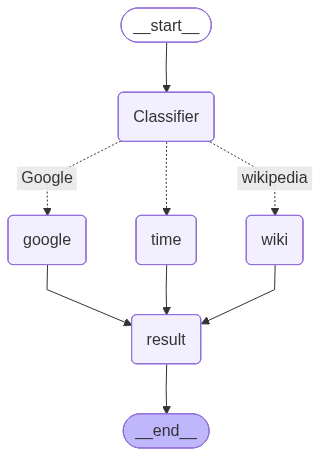

In [ ]:
### Setting up the StateGrap

graph = StateGraph(QueryState)

graph.add_node("Classifier",classify_query)
graph.add_node("time",fetch_time)
graph.add_node("wiki",wiki)
graph.add_node("google",google_search)
graph.add_node("result",final_response)


graph.set_entry_point("Classifier")

graph.add_conditional_edges(
    "Classifier",
    lambda state: state["source"],
    {
        "time":"time",
        "wikipedia": "wiki",
        "Google":"google"
    }
)

graph.add_edge("time","result")
graph.add_edge("wiki","result")
graph.add_edge("google","result")

graph_duild = graph.compile()

display(Image(graph_duild.get_graph().draw_mermaid_png()))

In [70]:
graph_duild.invoke({"query":"Gandhi from Google","source":"","result":""})

Final Answer: 
{'query': 'Gandhi from Google', 'source': 'google', 'result': ''}


{'query': 'Gandhi from Google', 'source': 'google', 'result': ''}